TEXT MINING

# S16 T01: Pipelines, grid search i text mining

In [1]:
# Imoporting packages
# ==============================================================================
import pandas as pd 
import datetime as dt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import math
from collections import Counter

from sklearn import preprocessing as prp
from sklearn import model_selection as ms
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn import metrics
from sklearn import pipeline
from sklearn import compose

from textblob import TextBlob

import nltk
from nltk import tokenize 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Pandas Configuration
# ==============================================================================
pd.set_option('float_format', '{:.2f}'.format) # float numbers with 2 decimals
pd.set_option("display.max_columns", None) # Display all columns

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/Jahdry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Jahdry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Jahdry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Jahdry/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



## **Nivell 1**
- Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

For this exercise NBA_player_data_Eur_Units.csv will be used. This is a Dataset preprocessed and modified from the origina [NBA Players stats since 1950](https://www.kaggle.com/drgilermo/nba-players-stats) on Kaggle.  

The current dataset has been converted to international units and has no missing values. You can see the prior data processing [here](https://github.com/Jahdry/Data_Science_Submits/blob/main/Sprint9/Feature_engineering.ipynb).

### **Loading the data and showing its caracteristics**

In [2]:
# Loading the dataset
nba_players = pd.read_csv('../db/NBA PLAYERS STATS/player_data_Eur_units.csv', index_col=0)
nba_players.head()

,year_start,year_end,position,position_numeric,height,height cm,weight,weight Kg,birth_date,college
name,,,,,,,,,,
Alaa Abdelnaby,1991,1995,F-C,4,6-10,208,240.00,108.86,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,4,6-9,205,235.00,106.60,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,5,7-2,218,225.00,102.06,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,1,6-1,185,162.00,73.48,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,3,6-6,198,223.00,101.15,"November 3, 1974",San Jose State University


In [3]:
nba_players.describe(include='all')

,year_start,year_end,position,position_numeric,height,height cm,weight,weight Kg,birth_date,college
count,4213.00,4213.00,4213,4213.00,4213,4213.00,4213.00,4213.00,4213,4213
unique,nan,nan,7,nan,28,nan,nan,nan,3893,470
top,nan,nan,G,nan,6-7,nan,nan,nan,"October 25, 1948",University of Kentucky
freq,nan,nan,1501,nan,441,nan,nan,nan,3,99
mean,1984.06,1988.27,NaN,2.49,NaN,197.24,207.72,94.22,NaN,NaN
std,20.70,21.59,NaN,1.34,NaN,9.05,25.45,11.54,NaN,NaN
min,1947.00,1947.00,NaN,1.00,NaN,160.00,133.00,60.33,NaN,NaN
25%,1969.00,1972.00,NaN,1.00,NaN,190.00,189.00,85.73,NaN,NaN
50%,1985.00,1990.00,NaN,3.00,NaN,198.00,205.00,92.99,NaN,NaN
75%,2001.00,2007.00,NaN,3.00,NaN,205.00,225.00,102.06,NaN,NaN


In [4]:
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, Alaa Abdelnaby to Matt Zunic
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year_start        4213 non-null   int64  
 1   year_end          4213 non-null   int64  
 2   position          4213 non-null   object 
 3   position_numeric  4213 non-null   int64  
 4   height            4213 non-null   object 
 5   height cm         4213 non-null   int64  
 6   weight            4213 non-null   float64
 7   weight Kg         4213 non-null   float64
 8   birth_date        4213 non-null   object 
 9   college           4213 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 362.1+ KB


### **Defining the process will be aplied to the data**

In [5]:
# Convert the dtypes and create 2 new Atributes 'birth_year' and birth_month'

nba_1 = nba_players.copy()
nba_1['birth_date'] = pd.to_datetime(nba_1['birth_date'])
nba_1['birth_year'] = nba_1['birth_date'].dt.year
nba_1['birth_month'] = nba_1['birth_date'].dt.month.astype(object)
nba_1['position_numeric'] = nba_1['position_numeric'].astype(object)
nba_1.info()
    

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, Alaa Abdelnaby to Matt Zunic
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year_start        4213 non-null   int64         
 1   year_end          4213 non-null   int64         
 2   position          4213 non-null   object        
 3   position_numeric  4213 non-null   object        
 4   height            4213 non-null   object        
 5   height cm         4213 non-null   int64         
 6   weight            4213 non-null   float64       
 7   weight Kg         4213 non-null   float64       
 8   birth_date        4213 non-null   datetime64[ns]
 9   college           4213 non-null   object        
 10  birth_year        4213 non-null   int64         
 11  birth_month       4213 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 427.9+ KB


In [6]:
# Dividing the dataset in train/test
X1 = nba_1.drop('height cm', 1)
y1 = nba_1['height cm']

In [7]:
# Dropping the attributes that doesn't add value or have duplicated info as attributes in Imperial Units,
# North american player possition and the birthdate in format datetype. For this example the attribute college will also be removed as it would increase our dataframe widely when converting to One Hot attributes.

X1= X1.drop(columns=['college', 'birth_date', 'weight', 'height', 'position'])

In [8]:
# Transforming the attributes depending on its type: 

feat_numeric = X1.select_dtypes(exclude='object')
feat_cat = X1.select_dtypes(include='object')

transformer_num = prp.StandardScaler(with_mean= True, with_std=True) #Standard Scaler for numerical attributes
transformer_cat = prp.OneHotEncoder(sparse=False) #Dummy Matrix for categorical attribute

In [9]:
# Converting the arrays into a single Dataframe
X_num = transformer_num.fit_transform(feat_numeric)
X_num = pd.DataFrame(X_num, columns=feat_numeric.columns, index=feat_numeric.index)

X_cat = transformer_cat.fit_transform(feat_cat)
X_cat = pd.DataFrame(X_cat, index=feat_cat.index)

X = pd.concat([X_num, X_cat], axis=1)
X

,year_start,year_end,weight Kg,birth_year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
name,,,,,,,,,,,,,,,,,,,,,
Alaa Abdelnaby,0.34,0.31,1.27,0.37,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Zaid Abdul-Aziz,-0.73,-0.48,1.07,-0.66,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kareem Abdul-Jabbar,-0.68,0.03,0.68,-0.61,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mahmoud Abdul-Rauf,0.34,0.59,-1.80,0.42,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tariq Abdul-Wahad,0.67,0.68,0.60,0.65,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Derrick Zimmerman,1.06,0.82,-0.50,0.98,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
Stephen Zimmerman,1.59,1.33,1.27,1.68,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
Jim Zoet,-0.05,-0.24,1.27,-0.33,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [10]:
# randomly split the data intro train/test
X1_train, X1_test, y1_train, y1_test = ms.train_test_split(X1, y1,test_size=0.25,random_state=42)

In [11]:
# Generating and fitting the model 
random_forest = ensemble.RandomForestRegressor(max_depth=50, random_state=42)
random_forest.fit(X1_train, y1_train)

# Obtaining RMSE scores for the train and test Data. 

train_score = random_forest.score(X1_train, y1_train)
test_score = random_forest.score(X1_test, y1_test)
train_predict  = random_forest.predict(X1_train)
test_predict = random_forest.predict(X1_test)

train_RMSE = metrics.mean_squared_error(y1_train, train_predict)
test_RMSE = metrics.mean_squared_error(y1_test, test_predict)

scorers={'Manual Processing': [train_score, train_RMSE, test_score, test_RMSE]}

print(train_RMSE, test_RMSE)

2.1182453619584907 12.706872368811506


### **Setting the pipeline**

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

# Transforming Attributes 'birth_date' to 'datetime' and adding 'birht_year' and 'birht_month'.
# Transforming 'possition_numeri' to 'object' as they are categories.

class Transformer():

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, dataframe):
        copy = dataframe.copy()
        copy['birth_date'] = pd.to_datetime(copy['birth_date'])
        copy['birth_year'] = copy['birth_date'].dt.year
        copy['birth_month'] = copy['birth_date'].dt.month
        copy['position_numeric'] = copy['position_numeric'].astype(object)
        copy.drop('birth_date', 1, inplace=False)
        return copy
    

In [13]:
# Dividing dependent and independent Attributes
X = nba_players.drop('height cm', 1)
y = nba_players['height cm']

# randomly split the datainto train/test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y,test_size=0.25,random_state=42)

# generating the model object
random_forest = ensemble.RandomForestRegressor(random_state=42, n_jobs=3)

# Creating the transformers to apply to de data t make that same processing that decribed above.
preprocessor = compose.ColumnTransformer(transformers=[
    #('drop', 'drop', ['college', 'birth_date', 'weight', 'height', 'position']),
    ('scaling', prp.StandardScaler(with_mean= True, with_std=True), ['year_start','year_end','weight Kg','birth_year', 'birth_month']),
    ('onehot', prp.OneHotEncoder(sparse=False), ['position_numeric'])]
    , n_jobs=3)

# setting the steps in the pipeline:
# (Transform dtypes --> Transform Attrbutes (StandardScaler + OneHot) --> model processing)
nba_pipeline = pipeline.Pipeline(steps=[
    ('data_trans', Transformer()),
    ('pre_processing', preprocessor),
    ('random_forest', random_forest)])

In [14]:
# Fitting the model with the train values
nba_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_trans', <__main__.Transformer object at 0x7f85ce0f2880>),
                ('pre_processing',
                 ColumnTransformer(n_jobs=3,
                                   transformers=[('scaling', StandardScaler(),
                                                  ['year_start', 'year_end',
                                                   'weight Kg', 'birth_year',
                                                   'birth_month']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse=False),
                                                  ['position_numeric'])])),
                ('random_forest',
                 RandomForestRegressor(n_jobs=3, random_state=42))])

In [15]:
# Predictions and scorers of the model
y_train_predict  = nba_pipeline.predict(X_train)
y_test_predict = nba_pipeline.predict(X_test)

train_score = nba_pipeline.score(X_train, y_train)
test_score = nba_pipeline.score(X_test, y_test)
train_RMSE = metrics.mean_squared_error(y_train, y_train_predict)
test_RMSE = metrics.mean_squared_error(y_test, y_test_predict)

scorers['Pipeline'] = [train_score, train_RMSE, test_score, test_RMSE]

print( f'Score:\nTrain = {train_score}, Test = {test_score}')
print( f'RMSE:\nTrain = {train_RMSE}, Test = {test_RMSE}')

Score:
Train = 0.9744841504278827, Test = 0.8358714979403449
RMSE:
Train = 2.117525300644274, Test = 12.829271438553377


**The results of the manual processing and the pipeline are the same, indicating that the process described in the pipelie is analog to the manual.**

### **Hyperparameter Tuning with 'Grid Search'**

In [16]:
n_estimators = [10, 100]
criterion =['mse', 'mae']
max_depth = [10,100,None]
min_samples_split = [2,5]
max_features = ['auto']
ccp_alpha = [0.0, 0.01, 0.1]
parameters = {
    'random_forest__n_estimators': n_estimators,
    'random_forest__criterion':criterion, 
    'random_forest__max_depth':max_depth, 
    'random_forest__min_samples_split':min_samples_split, 
    'random_forest__max_features': max_features,
    }
grid = ms.GridSearchCV(estimator= nba_pipeline, param_grid=parameters, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_trans',
                                        <__main__.Transformer object at 0x7f85ce0f2880>),
                                       ('pre_processing',
                                        ColumnTransformer(n_jobs=3,
                                                          transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['year_start',
                                                                          'year_end',
                                                                          'weight '
                                                                          'Kg',
                                                                          'birth_year',
                                                                          'birth_month']),
                   

In [17]:
y_train_predict = grid.predict(X_train)
y_test_predict = grid.predict(X_test)


train_score = grid.score(X_train, y_train)
test_score = grid.score(X_test, y_test)
train_RMSE = metrics.mean_squared_error(y_train, y_train_predict)
test_RMSE = metrics.mean_squared_error(y_test, y_test_predict)

scorers['GridSearch'] = [train_score, train_RMSE, test_score, test_RMSE]

print ('Best Score:', grid.score(X_test,y_test))
print ('Best Parameters: ', grid.best_params_)
print ('Train Score: ', train_score)
print ('Test Score: ', test_score)
print ('Train RMSE: ', train_RMSE)
print ('Test RMSE: ', test_RMSE)

Best Score: 0.8489459908156629
Best Parameters:  {'random_forest__criterion': 'mae', 'random_forest__max_depth': 10, 'random_forest__max_features': 'auto', 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 100}
Train Score:  0.8935488380125215
Test Score:  0.8489459908156629
Train RMSE:  8.834235683760681
Test RMSE:  11.807290393738139


In [18]:
scorers_df = pd.DataFrame(scorers, index=['train_score', 'Train_RMSE', 'test_score', 'test_RMSE'])
scorers_df

,Manual Processing,Pipeline,GridSearch
train_score,0.97,0.97,0.89
Train_RMSE,2.12,2.12,8.83
test_score,0.84,0.84,0.85
test_RMSE,12.71,12.83,11.81


**Using the best paramenters, found by the GridSearch, the metrics using train data are worst but better with the test data, compared with raw processing**


- Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

### **Selecting the paragraph**

In [19]:
# Praragraf from George Orwell's 1984 about Doublethinking
# ============================================================================

text = """To know and not to know, to be conscious of complete truthfulness while telling carefully constructed lies, to hold simultaneously two opinions which cancelled out,
knowing them to be contradictory and believing in both of them, to use logic against logic, to repudiate morality while laying claim to it,
to believe that democracy was impossible and that the Party was the guardian of democracy, to forget whatever it was necessary to forget, 
then to draw it back into memory again at the moment when it was needed, and then promptly to forget it again: and above all,
to apply the same process to the process itself. That was the ultimate subtlety: consciously to induce unconsciousness, and then,
once again, to become unconscious of the act of hypnosis you had just performed. Even to understand the word ‘doublethink’ involved the use of doublethink."""

# transforming to lowercase
text = text.lower()
text

'to know and not to know, to be conscious of complete truthfulness while telling carefully constructed lies, to hold simultaneously two opinions which cancelled out,\nknowing them to be contradictory and believing in both of them, to use logic against logic, to repudiate morality while laying claim to it,\nto believe that democracy was impossible and that the party was the guardian of democracy, to forget whatever it was necessary to forget, \nthen to draw it back into memory again at the moment when it was needed, and then promptly to forget it again: and above all,\nto apply the same process to the process itself. that was the ultimate subtlety: consciously to induce unconsciousness, and then,\nonce again, to become unconscious of the act of hypnosis you had just performed. even to understand the word ‘doublethink’ involved the use of doublethink.'

### **Tokenization**

In [20]:
# Sentence Tokenization

token_sent = tokenize.sent_tokenize(text)
for i in token_sent:
    print(i)

to know and not to know, to be conscious of complete truthfulness while telling carefully constructed lies, to hold simultaneously two opinions which cancelled out,
knowing them to be contradictory and believing in both of them, to use logic against logic, to repudiate morality while laying claim to it,
to believe that democracy was impossible and that the party was the guardian of democracy, to forget whatever it was necessary to forget, 
then to draw it back into memory again at the moment when it was needed, and then promptly to forget it again: and above all,
to apply the same process to the process itself.
that was the ultimate subtlety: consciously to induce unconsciousness, and then,
once again, to become unconscious of the act of hypnosis you had just performed.
even to understand the word ‘doublethink’ involved the use of doublethink.


In [21]:
# Word Tokenization

token_word = tokenize.word_tokenize(text)
word_dict = Counter(token_word)
print(word_dict)
print(len(word_dict))

Counter({'to': 18, ',': 13, 'the': 9, 'and': 6, 'of': 6, 'it': 5, 'was': 5, 'that': 3, 'forget': 3, 'then': 3, 'again': 3, '.': 3, 'know': 2, 'be': 2, 'while': 2, 'them': 2, 'use': 2, 'logic': 2, 'democracy': 2, ':': 2, 'process': 2, 'doublethink': 2, 'not': 1, 'conscious': 1, 'complete': 1, 'truthfulness': 1, 'telling': 1, 'carefully': 1, 'constructed': 1, 'lies': 1, 'hold': 1, 'simultaneously': 1, 'two': 1, 'opinions': 1, 'which': 1, 'cancelled': 1, 'out': 1, 'knowing': 1, 'contradictory': 1, 'believing': 1, 'in': 1, 'both': 1, 'against': 1, 'repudiate': 1, 'morality': 1, 'laying': 1, 'claim': 1, 'believe': 1, 'impossible': 1, 'party': 1, 'guardian': 1, 'whatever': 1, 'necessary': 1, 'draw': 1, 'back': 1, 'into': 1, 'memory': 1, 'at': 1, 'moment': 1, 'when': 1, 'needed': 1, 'promptly': 1, 'above': 1, 'all': 1, 'apply': 1, 'same': 1, 'itself': 1, 'ultimate': 1, 'subtlety': 1, 'consciously': 1, 'induce': 1, 'unconsciousness': 1, 'once': 1, 'become': 1, 'unconscious': 1, 'act': 1, 'hypn

In [22]:
freq_dist = FreqDist(token_word)
print(freq_dist)
print(freq_dist.most_common(10))

<FreqDist with 87 samples and 162 outcomes>
[('to', 18), (',', 13), ('the', 9), ('and', 6), ('of', 6), ('it', 5), ('was', 5), ('that', 3), ('forget', 3), ('then', 3)]


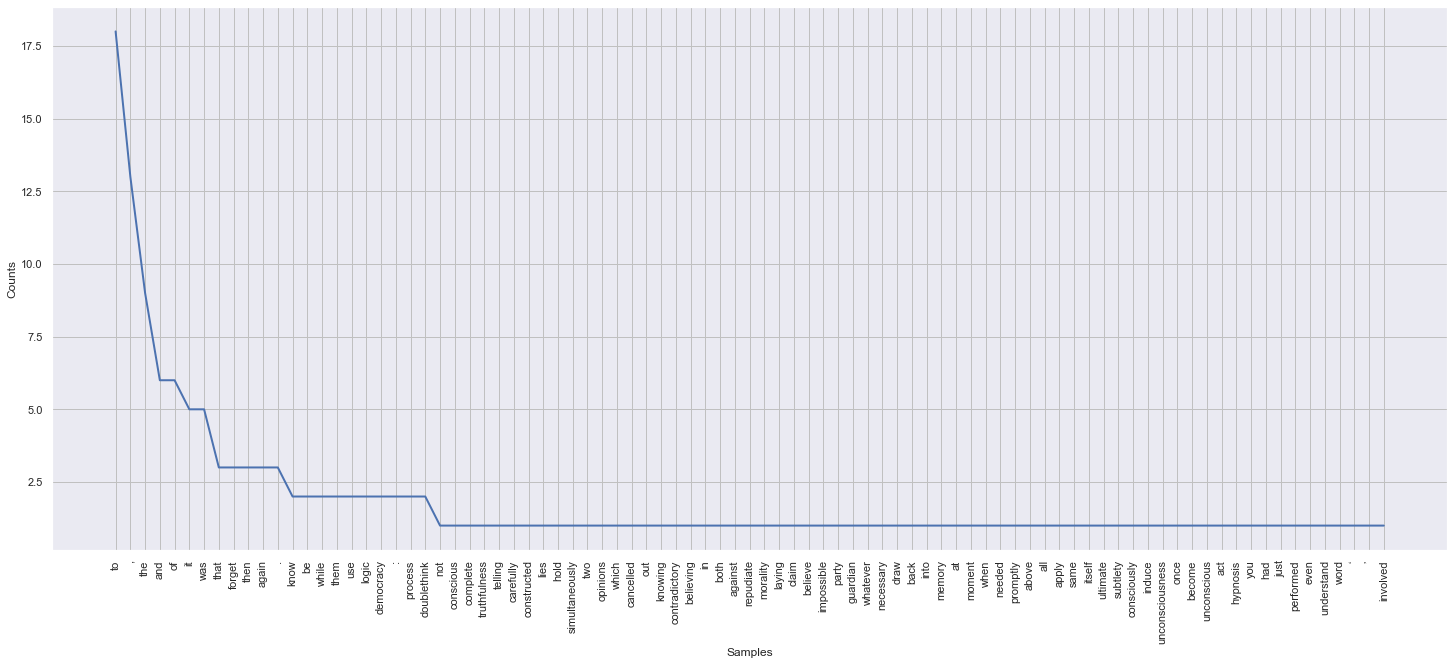

In [23]:
fig = plt.subplots(figsize=(25,10))
freq_dist.plot(100,cumulative=False)
plt.show()

In [24]:
# Word tokenization with RegEx to remove punctuation

token_regex = tokenize.RegexpTokenizer(r'\w+')
token = token_regex.tokenize(text)
print(token)

['to', 'know', 'and', 'not', 'to', 'know', 'to', 'be', 'conscious', 'of', 'complete', 'truthfulness', 'while', 'telling', 'carefully', 'constructed', 'lies', 'to', 'hold', 'simultaneously', 'two', 'opinions', 'which', 'cancelled', 'out', 'knowing', 'them', 'to', 'be', 'contradictory', 'and', 'believing', 'in', 'both', 'of', 'them', 'to', 'use', 'logic', 'against', 'logic', 'to', 'repudiate', 'morality', 'while', 'laying', 'claim', 'to', 'it', 'to', 'believe', 'that', 'democracy', 'was', 'impossible', 'and', 'that', 'the', 'party', 'was', 'the', 'guardian', 'of', 'democracy', 'to', 'forget', 'whatever', 'it', 'was', 'necessary', 'to', 'forget', 'then', 'to', 'draw', 'it', 'back', 'into', 'memory', 'again', 'at', 'the', 'moment', 'when', 'it', 'was', 'needed', 'and', 'then', 'promptly', 'to', 'forget', 'it', 'again', 'and', 'above', 'all', 'to', 'apply', 'the', 'same', 'process', 'to', 'the', 'process', 'itself', 'that', 'was', 'the', 'ultimate', 'subtlety', 'consciously', 'to', 'induce'

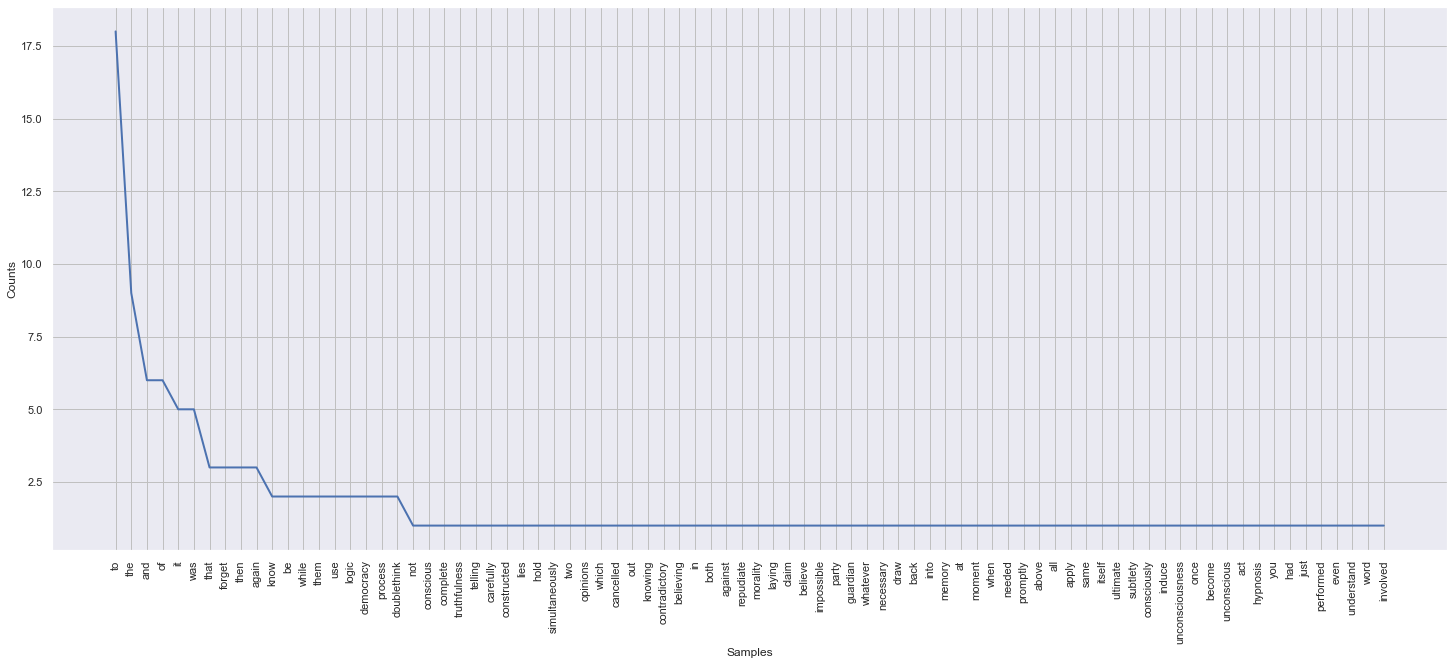

In [25]:
freq_dist = FreqDist(token)
plt.subplots(figsize=(25,10))
freq_dist.plot(100,cumulative=False)
plt.show()


## **Nivell 2**
- Exercici 1

Treu les stopwords i realitza stemming al teu conjunt de dades.


### **Removing StopWords**

In [26]:
# setting the stopwords list for the language of the text

stopwords = set(stopwords.words('english'))
print(stopwords)

{'down', 'out', 'isn', 'did', 'should', 'her', 'in', 'both', 'same', 'ours', 'mightn', "she's", 'until', 'up', 'now', "wouldn't", "hasn't", 'all', 'himself', 'o', 'some', 'own', 'y', 'an', 'these', 'it', 'when', "needn't", 'does', 'most', 'over', 'at', 'no', 'having', 'their', 'hasn', "hadn't", 'whom', 'for', 'so', 's', 'doing', 'but', 'under', "it's", 'don', 'if', 'not', "mightn't", 'here', 'against', 'during', 'very', 'were', 'being', 'about', "mustn't", 'be', 'between', 'll', 'where', 'doesn', "you'll", 'won', 'are', "you'd", "you're", 'needn', 'your', 'our', 'just', "shouldn't", 'hers', 'by', 'other', "shan't", "couldn't", 'me', 'what', 'which', "should've", 'and', 'a', 'of', 'is', 'how', 'its', 't', 'on', 'was', 'below', 'those', 'this', 'there', 'too', 'while', "doesn't", 'or', 're', 'itself', 'again', 'wouldn', 'the', 'further', 'from', "don't", 'ain', 'am', 'weren', 'only', 'been', 'wasn', 'haven', "wasn't", 'couldn', "didn't", 'he', "that'll", 'that', 'has', 'had', 'through', 

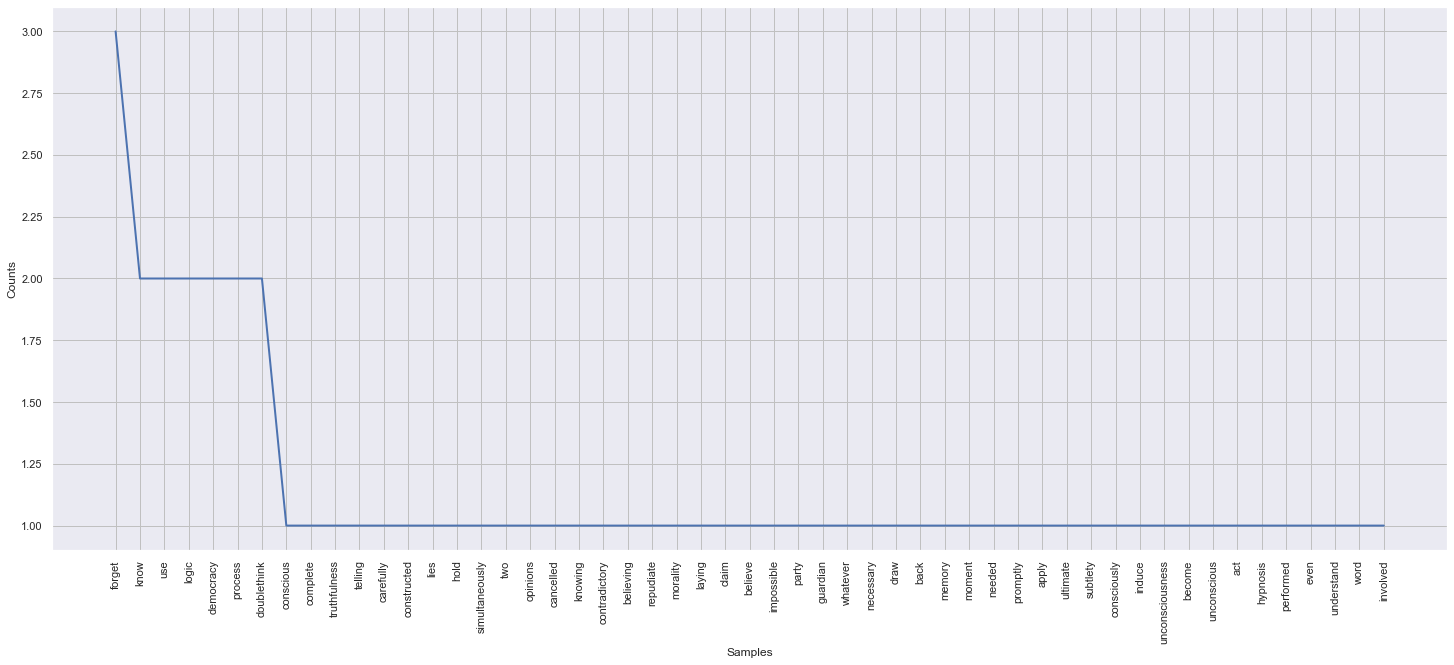

In [27]:
# Removing the stopwords from the text

words_filt = []

for word in token:
    if word not in stopwords:
        words_filt.append(word)

freq_dist = FreqDist(words_filt)
plt.subplots(figsize=(25,10))
freq_dist.plot(100,cumulative=False)
plt.show()

### **Apllining Porter Steemer**

Porter Stemer reduces the words to its root word in order to group words with the same root.

In [28]:
# Porter Steemer

ps = PorterStemmer()

stemmed_words=[]
for w in token:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",token_word)
print()
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['to', 'know', 'and', 'not', 'to', 'know', ',', 'to', 'be', 'conscious', 'of', 'complete', 'truthfulness', 'while', 'telling', 'carefully', 'constructed', 'lies', ',', 'to', 'hold', 'simultaneously', 'two', 'opinions', 'which', 'cancelled', 'out', ',', 'knowing', 'them', 'to', 'be', 'contradictory', 'and', 'believing', 'in', 'both', 'of', 'them', ',', 'to', 'use', 'logic', 'against', 'logic', ',', 'to', 'repudiate', 'morality', 'while', 'laying', 'claim', 'to', 'it', ',', 'to', 'believe', 'that', 'democracy', 'was', 'impossible', 'and', 'that', 'the', 'party', 'was', 'the', 'guardian', 'of', 'democracy', ',', 'to', 'forget', 'whatever', 'it', 'was', 'necessary', 'to', 'forget', ',', 'then', 'to', 'draw', 'it', 'back', 'into', 'memory', 'again', 'at', 'the', 'moment', 'when', 'it', 'was', 'needed', ',', 'and', 'then', 'promptly', 'to', 'forget', 'it', 'again', ':', 'and', 'above', 'all', ',', 'to', 'apply', 'the', 'same', 'process', 'to', 'the', 'process', 'itself', '

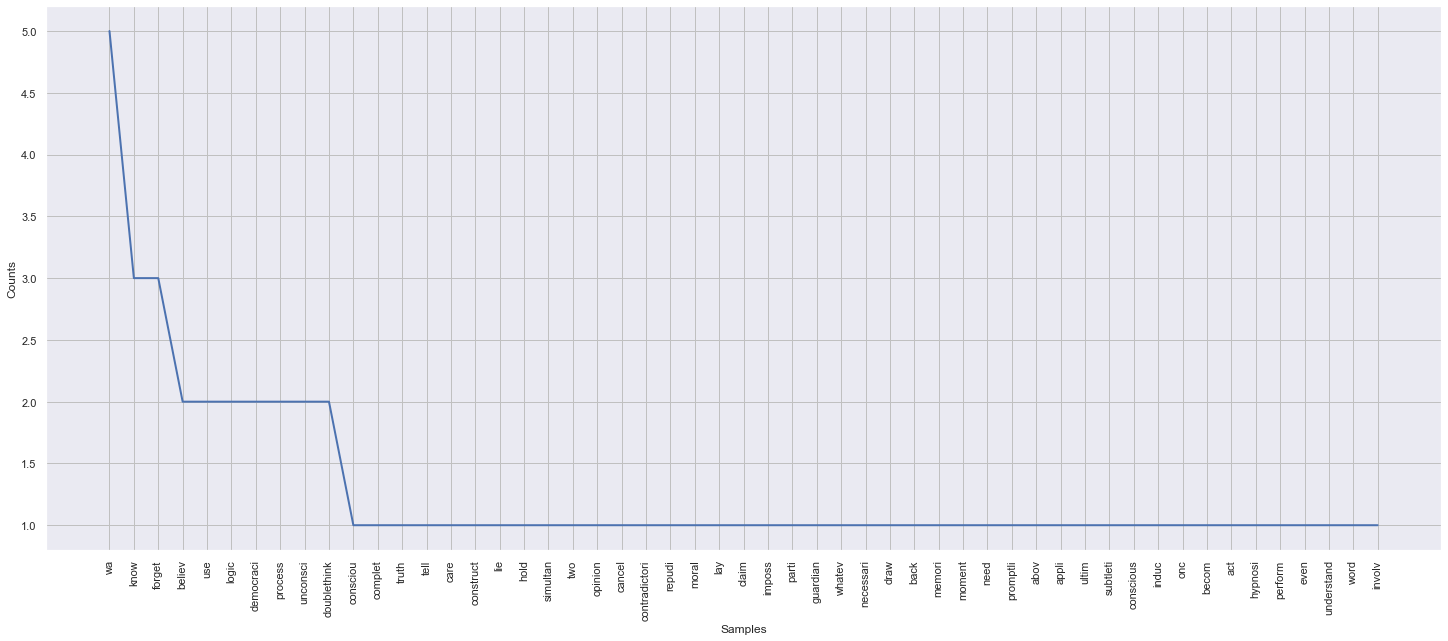

In [29]:
# Plotting the stemmed words without stopwords

words_filt = []

for word in stemmed_words:
    if word not in stopwords:
        words_filt.append(word)

freq_dist = FreqDist(words_filt)
plt.subplots(figsize=(25,10))
freq_dist.plot(100,cumulative=False)
plt.show()

### ***POS Tagging**

POS makes a gramatical examing of the sentence, indicating which kind of word is every word in the sentence.

In [30]:
# POS Tagging

sentence = token_sent[2]
tokens = token_regex.tokenize(sentence)
tagged = nltk.pos_tag(tokens)

print(sentence)
print(tagged)

even to understand the word ‘doublethink’ involved the use of doublethink.
[('even', 'RB'), ('to', 'TO'), ('understand', 'VB'), ('the', 'DT'), ('word', 'NN'), ('doublethink', 'NN'), ('involved', 'VBD'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('doublethink', 'NN')]


## **Nivell 3**
- Exercici 1

Realitza sentiment analysis al teu conjunt de dades.
Recursos

In [31]:
# Sentiment analisis for the entire text

blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=-0.04666666666666667, subjectivity=0.5625)

In [32]:
# Sentiment analiis for each sentence

sentences_sentiment= {}
for sentence in blob.sentences: 
    sentences_sentiment[sentence] = sentence.sentiment

for sentence in sentences_sentiment.keys():
    print(f'SENTENCE:\n{sentence}')
    print(f'SENTIMENT:\n{sentences_sentiment[sentence]}')
    print()

SENTENCE:
to know and not to know, to be conscious of complete truthfulness while telling carefully constructed lies, to hold simultaneously two opinions which cancelled out,
knowing them to be contradictory and believing in both of them, to use logic against logic, to repudiate morality while laying claim to it,
to believe that democracy was impossible and that the party was the guardian of democracy, to forget whatever it was necessary to forget, 
then to draw it back into memory again at the moment when it was needed, and then promptly to forget it again: and above all,
to apply the same process to the process itself.
SENTIMENT:
Sentiment(polarity=-0.07083333333333333, subjectivity=0.515625)

SENTENCE:
that was the ultimate subtlety: consciously to induce unconsciousness, and then,
once again, to become unconscious of the act of hypnosis you had just performed.
SENTIMENT:
Sentiment(polarity=0.05, subjectivity=0.75)

SENTENCE:
even to understand the word ‘doublethink’ involved the us